In [1]:
import os
import glob
import pickle
import sys  

sys.path.insert(0, '../py')
from graviti import *

import numpy as np
import pandas as pd

from  matplotlib import pyplot

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_pickle('../py/df_clusters.pkl')
df.head()

,x_umap,y_umap,label,sample,UMAP_cluster_ID,x_pca,y_pca,PCA_cluster_ID
0,11.706586,1.591265,PRAD,TCGA-V1-A8MM-01Z-00-DX1,2,2.636636,-0.049061,1
1,12.430723,0.110868,PRAD,TCGA-X4-A8KQ-01Z-00-DX6,2,2.751517,0.057609,1
2,-2.589645,0.872954,PRAD,TCGA-HC-A9TE-01Z-00-DX1,1,-0.752319,-0.217008,0
3,10.997418,1.586069,PRAD,TCGA-X4-A8KQ-01Z-00-DX2,2,2.708605,0.060970,1
4,-4.088278,-0.650579,PRAD,TCGA-EJ-5512-01Z-00-DX1,1,-0.725039,-0.200668,0


In [3]:
import seaborn
seaborn.set(style='white')

fg = seaborn.FacetGrid(data=df[['x_umap','y_umap','UMAP_cluster_ID']], 
                       hue='UMAP_cluster_ID')
fg.map(pyplot.scatter, 'x_umap', 'y_umap').add_legend()

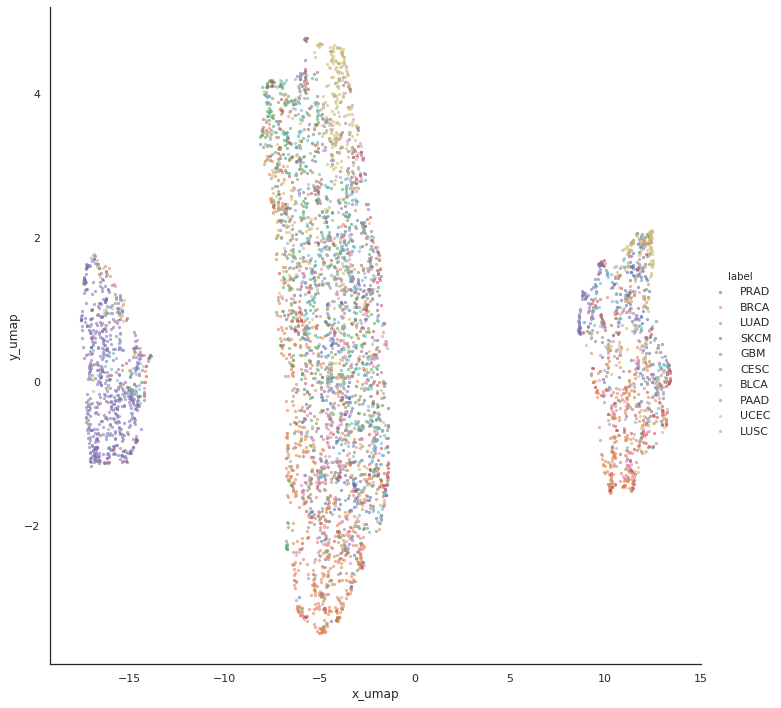

In [23]:

fg = seaborn.FacetGrid(data=df[['x_umap','y_umap','label']], 
                       hue='label',size=10)
fg.map(pyplot.scatter, 'x_umap', 'y_umap',s=5,alpha=0.5).add_legend()

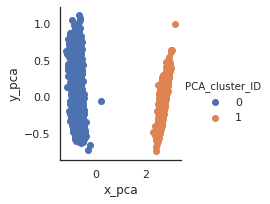

In [5]:
fg = seaborn.FacetGrid(data=df[['x_pca','y_pca','PCA_cluster_ID']], 
                       hue='PCA_cluster_ID')
fg.map(pyplot.scatter, 'x_pca', 'y_pca').add_legend()

In [ ]:
df.to_csv('df_clusters.csv')

Study the statistics of the covd barycenters

In [ ]:
barycenters = np.load('../py/covd_barycenters.npy')

infile = open('list_of_cancerID.pkl','rb')
cancerID = pickle.load(infile)
infile.close
print(barycenters.shape,len(cancerID))

In [34]:
df = pd.DataFrame([[s] for s in barycenters],columns= ['barycenters'])
df['cancerID'] = cancerID

In [35]:
#result = df.groupby(['cancerID'], as_index=False).agg({'barycenters':['mean']})

In [ ]:
groups = df.groupby('cancerID')
data = np.zeros((10,36))
row = 0
cancer_list = []
for name, group in groups:
    cancer_list.append(name)
    #group.x, group.y, marker='o', linestyle='', ms=3, label=name, alpha=0.75
    data[row,:] = group['barycenters'].mean()
    row += 1

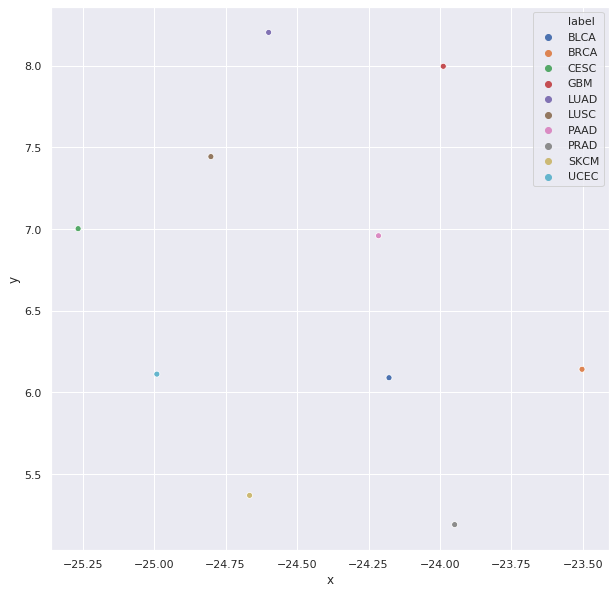

In [48]:
import umap
reducer = umap.UMAP(n_components=2)
embedding = reducer.fit_transform(data)
x = embedding[:,0]
y = embedding[:,1]
df_plot = pd.DataFrame(dict(x=x, y=y, label=cancer_list))
import seaborn as sns; sns.set()
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.scatterplot(x="x", y="y", hue="label",data=df_plot)

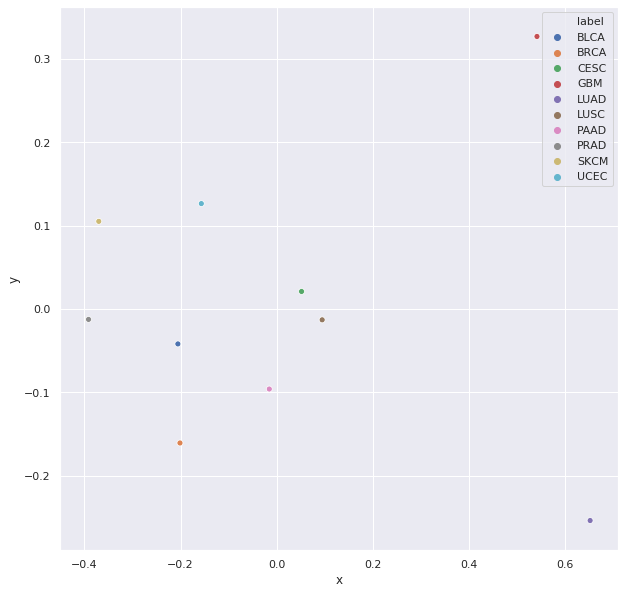

In [51]:
pca = PCA(n_components=2)
embedding = pca.fit_transform(data)
x = embedding[:,0]
y = embedding[:,1]
df_plot = pd.DataFrame(dict(x=x, y=y, label=cancer_list))
import seaborn as sns; sns.set()
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.scatterplot(x="x", y="y", hue="label",data=df_plot)